# MACHINE LEARNING

In [1]:
import seaborn as sns; sns.set()
#import pickle #sauvegarder un dictionnaire ( save un encodage )

In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris['species'].unique() #nunique <=> result.size

array(['setosa', 'versicolor', 'virginica'], dtype=object)

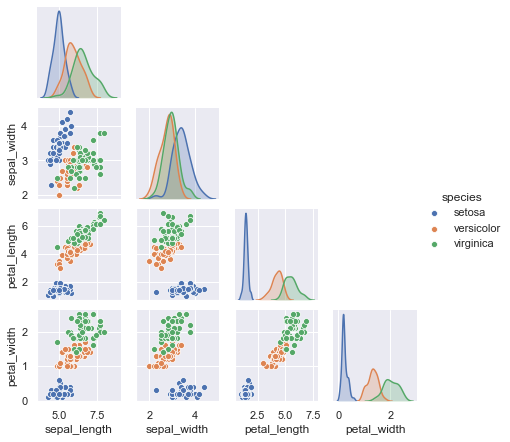

In [5]:
#kde, hist, ... #kde = kernel dimension estimation
sns.pairplot(iris, hue="species", diag_kind='kde', height=1.5, corner=True)

In [6]:
#Isoler la target [ISOLATION] & Transformer en nombres [ENCODAGE]
Y = iris['species'].astype('category').cat.codes

    # Retrouver la classe d'un code  #
    # Retrouver le code d'une classe #
#vocabulaire: iris['species'].astype('category').cat.categories
#class2index: {v:i for i, v in enumerate(vocabulaire.tolist())} #classe => nombre
#index2class: {i:v for i, v in enumerate(vocabulaire.tolist())} #nombre => classe
    # ou #
#classes = iris['species'].astype('category').cat.categories.tolist()
#classes.index('setosa')
#classes[0]

Y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [7]:
#Isoler les features [ISOLATION]
X = iris.drop('species', axis='columns')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#Vérification
X.shape[0] == Y.shape[0]

True

### TRAINING

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN #KNeighborsRegressor

In [10]:
#Passage des HYPERPARAMETRES
knn = KNN(n_neighbors=3)
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [11]:
#Entrainement
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
#Faire une prédiction
predictions = knn.predict(X)

In [13]:
#Créer une mesure de performance
def accuracy(preds, target):
    M = target.shape[0]
    total_correct = (preds == target).sum()
    accuracy = total_correct / M
    return accuracy

accuracy(predictions, Y)

0.96

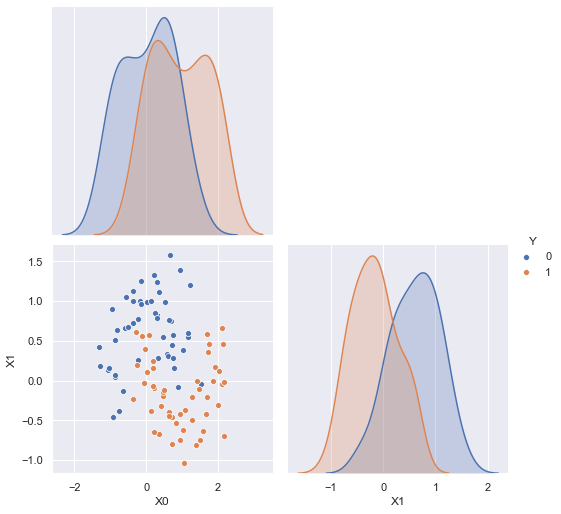

In [14]:
#Afficher les frontières de décision
from sklearn.datasets import make_moons
X, Y = make_moons(random_state=0, noise=0.3)
import pandas as pd
df_moon = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'Y':Y})
sns.pairplot(df_moon, hue="Y", diag_kind='kde', height=3.5, corner=True)

In [15]:
#1. on crée le maillage

def plage_de_valeur(df, col ,b=0.2): #bordure
    Min = df[col].min() - b
    Max = df[col].max() + b
    return (Min, Max)

#Créer les axes
import numpy as np
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'), 0.1)
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'), 0.1)

#Créer le maillage
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)
X0_mesh.shape, X1_mesh.shape

((31, 39), (31, 39))

In [16]:
#Démeler le maillage
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel()
X0_mesh.shape, X1_mesh.shape

((1209,), (1209,))

In [17]:
mesh_df = pd.DataFrame({"X0":X0_mesh, "X1":X1_mesh})

<AxesSubplot:xlabel='X0', ylabel='X1'>

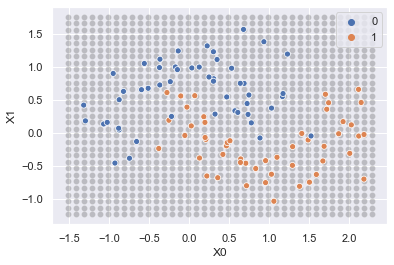

In [18]:
sns.scatterplot(X0_mesh, X1_mesh, color='black', alpha=0.2);
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

In [19]:
#Avec K=1
knn = KNN(n_neighbors=1)
knn.fit(X, Y);

<AxesSubplot:xlabel='X0', ylabel='X1'>

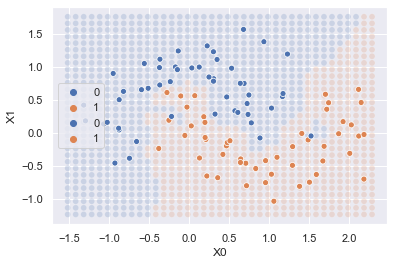

In [20]:
mesh_predictions = knn.predict(mesh_df)
sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

In [21]:
def plot_knn_decision(K=1):
    knn = KNN(n_neighbors=K)
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    print('K = ', K)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

K =  3


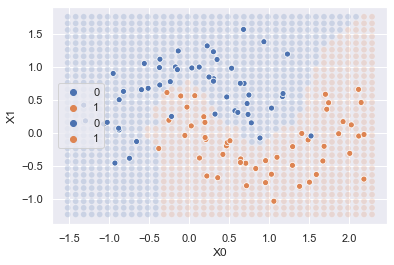

In [22]:
plot_knn_decision(3)

K =  1
K =  2
K =  3
K =  4


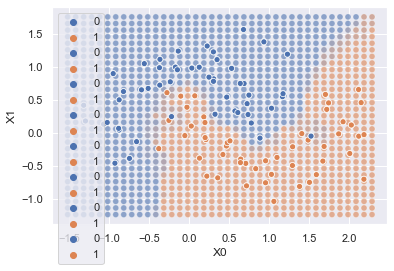

In [23]:
for i in range (1, 5):
    plot_knn_decision(i)